In [7]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn import ensemble, model_selection
from sklearn.metrics import mean_absolute_error, r2_score
register_matplotlib_converters()

In [2]:
# Refer to https://www.kaggle.com/robjan/ph-recognition
# Try to predict pH value based on RGB color
df = pd.read_csv("ph-data.csv", delimiter=",", decimal=".")
df

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
...,...,...,...,...
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13


/Users/martin/Library/Python/3.7/lib/python/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/martin/Library/Python/3.7/lib/python/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


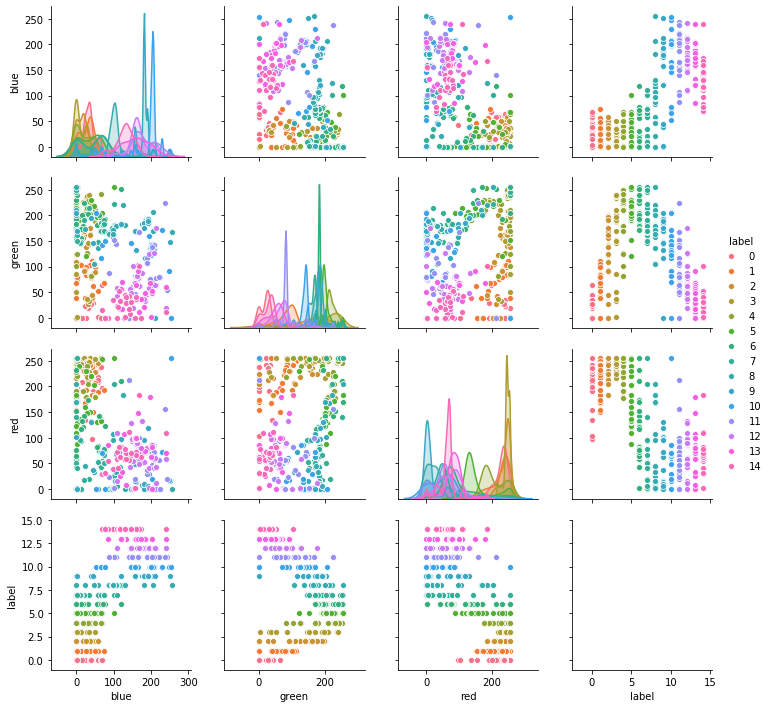

In [3]:
sns.pairplot(df, hue='label')

In [ ]:
# PCA anyone? (not covered in the read chapters, only as a pre-processing method, but is viable for first check of dataset predictability)


In [ ]:
# Calculate skewness of the data columns (normal distribution) see book page 31 to evaluate the need for log pre-processing


In [ ]:
# Should we center & scale the data?


In [6]:
# Create the target variable and the features to train
y = df.label
X = df[['blue', 'green', 'red']]
X.describe()

,blue,green,red
count,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436
std,74.974850,72.487085,89.581264
min,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000
50%,67.000000,146.000000,90.000000
75%,162.000000,189.000000,224.000000
max,255.000000,255.000000,255.000000


In [8]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.25, random_state=42)

# Initiate a random forest model and train it
rf_model = ensemble.RandomForestRegressor(random_state=12)
rf_model.fit(X_train, y_train)

/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12, verbose=0,
                      warm_start=False)

In [28]:
# Prediction on the test data
y_pred = rf_model.predict(X_test)

# Calculation of Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculation of R Squared value
r2_val = r2_score(y_test, y_pred)

print('Mean Absolute Error: %5.3f' % mae)
print('RMSE: %5.3f' % math.sqrt(mae))
print('R^2: %5.3f'  % r2_val)

Mean Absolute Error: 0.510
RMSE: 0.714
R^2: 0.932


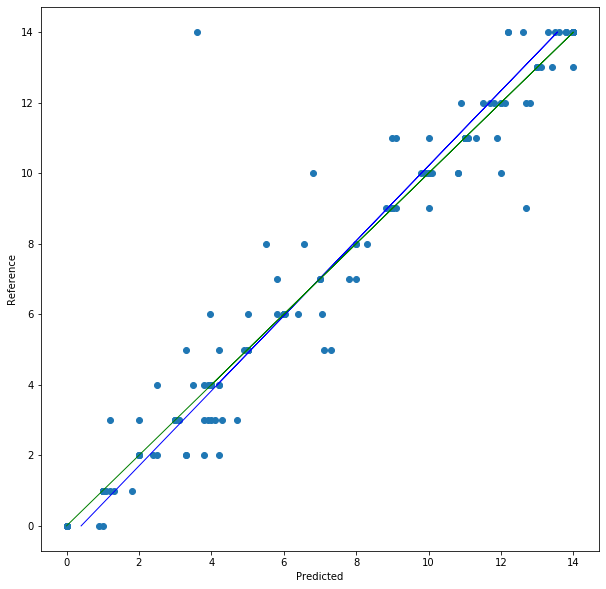

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Reference")

# Regression fit line
z = np.polyfit(y_test, y_pred, 1)
plt.plot(z[1]+z[0]*y_test, y_test, c='blue', linewidth=1) # predicted
plt.plot(y_test, y_test, color='green', linewidth=1) # reference


In [ ]:
# Are there any outliers? How to evaluate (see the book on Transformations p33)


In [ ]:
# Would you conclude that the model has predictive properties, or is the model overfitted?
# How would you evalute and resolve this question?
